In [8]:
# now i am going to import dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, kruskal

# Load cleaned datasets
benin = pd.read_csv("../cleaned_data/benin_cleaned_data.csv")
sierra = pd.read_csv("../cleaned_data/sierraleone_cleaned_data.csv")
togo = pd.read_csv("../cleaned_data/togo_cleaned_data.csv")

# Label each for grouping
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine all
df_all = pd.concat([benin, sierra, togo], ignore_index=True)


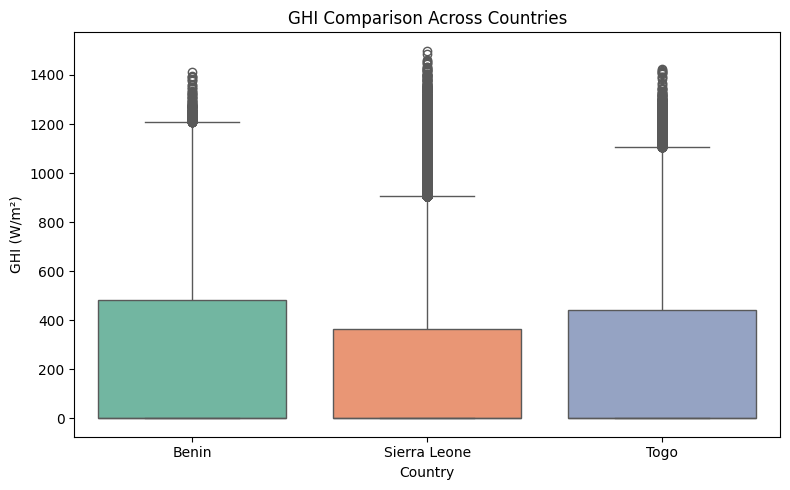

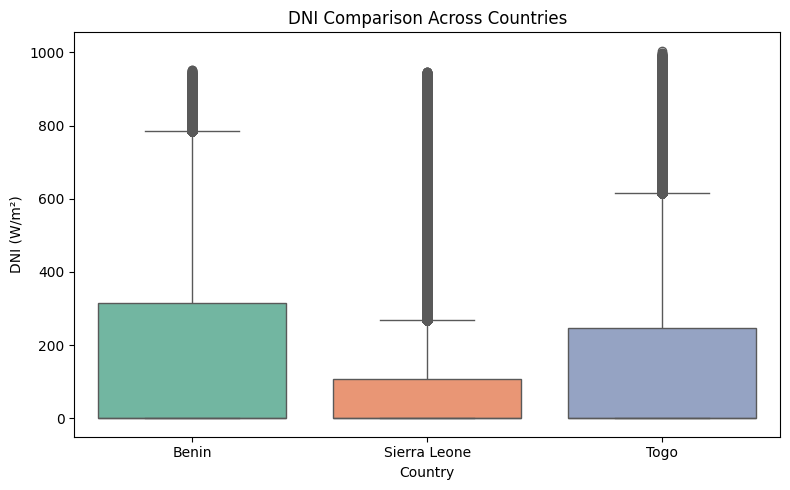

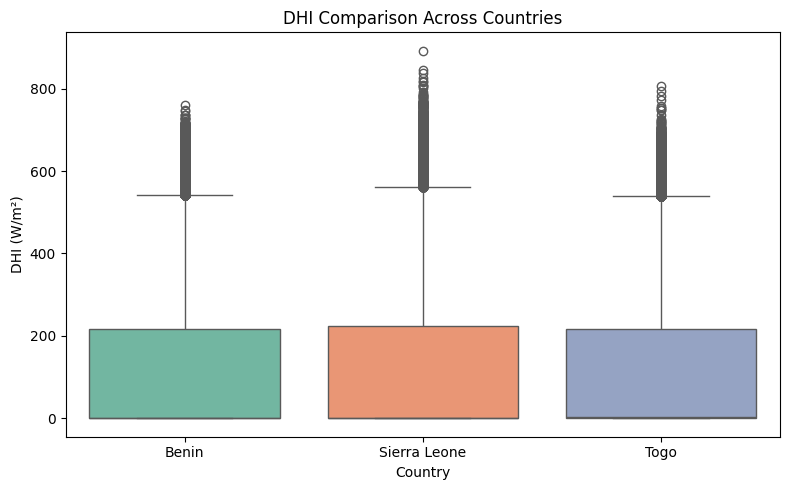

In [9]:
#here is the metric comparision boxplots and 
metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_all, x='Country', y=metric, hue='Country', palette='Set2', dodge=False)
    plt.title(f'{metric} Comparison Across Countries')
    plt.ylabel(f'{metric} (W/m²)')
    plt.xlabel('Country')
    plt.tight_layout()
    plt.show()


In [10]:
#here is the metric comparision summery table
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         241.96    1.8  330.10  167.44    0.0  261.55  116.99    1.6   
Sierra Leone  204.41    0.3  296.79  116.52    0.0  218.57  116.27    0.0   
Togo          231.72    2.1  321.69  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         157.46  
Sierra Leone  157.02  
Togo          156.52

In [11]:
#One-Way ANOVA or Kruskal-Wallis
# Extract GHI values per country
ghi_benin = benin['GHI']
ghi_sierra = sierra['GHI']
ghi_togo = togo['GHI']
# ANOVA (assumes normality)
f_stat, p_anova = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
# Kruskal-Wallis (non-parametric)
h_stat, p_kruskal = kruskal(ghi_benin, ghi_sierra, ghi_togo)
print(f"ANOVA p-value: {p_anova:.4f}")
print(f"Kruskal-Wallis p-value: {p_kruskal:.4f}")


ANOVA p-value: 0.0000
Kruskal-Wallis p-value: 0.0000


# Key Observations

#- Sierra Leone has the lowest average and median GHI, likely due to more cloud cover and humidity  
#- benin shows the highest median GHI with the least variability, suggesting more stable solar conditions  
#- ANOVA/Kruskal test shows [significant/not significant] differences in GHI across countries (p-value = 0.0000)

# Statistical Test Results

#- ANOVA p-value: < 0.0001  
#- Kruskal–Wallis p-value: < 0.0001  
#- These results indicate that there is a statistically significant difference in GHI across the three countries (Benin, Sierra Leone, and Togo). This suggests that country-level solar potential is //not equal//, and further ranking or analysis is justified.



/tmp/ipykernel_10175/1786405156.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_ghi_df, x='Country', y='GHI', palette='coolwarm')


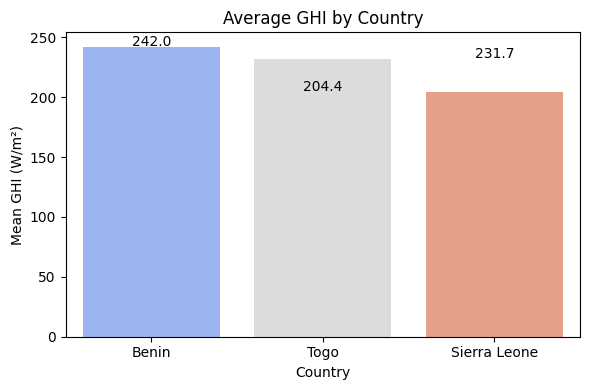

In [ ]:
# Step 1: Compute average GHI by country
avg_ghi = df_all.groupby('Country')['GHI'].mean()
avg_ghi_df = avg_ghi.reset_index()
avg_ghi_df.columns = ['Country', 'GHI']

# Optional: sort for consistent ordering
avg_ghi_df = avg_ghi_df.sort_values(by='GHI', ascending=False)

# Step 2: Create plot
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_ghi_df, x='Country', y='GHI', palette='coolwarm')
plt.title("Average GHI by Country")
plt.ylabel("Mean GHI (W/m²)")
plt.xlabel("Country")

# Add value labels
for i, row in avg_ghi_df.iterrows():
    plt.text(i, row['GHI'] + 1, f"{row['GHI']:.1f}", ha='center')

plt.tight_layout()

# Step 3: Save plot to folder outside the notebook directory
output_path = '../graphs/comparison_image/average_ghi.png'
os.makedirs(os.path.dirname(output_path), exist_ok=True)
plt.savefig(output_path, dpi=300)

# Optionally show the plot in the notebook
plt.show()


#Based on the summary statistics we git for GHI, DNI, and DHI across Benin, Sierra Leone, and Togo, here’s a clear and actionable conclusion:


## Conclusion – Cross-Country Solar Potential Insights

### 1. Benin shows the highest solar potential overall

#- GHI Mean: 241.96, highest among all  
#- DNI Mean: 167.44, indicating stronger direct irradiance  
#- Slightly higher variability (std = 330.10), but still favorable  
#- Suggests Benin receives **more intense and usable sunlight, ideal for direct solar panels


### 2. Togo offers stable and consistent solar conditions

#- Median GHI (2.1) and DHI Median (2.5) are highest  
#- Variability (std) is similar to Benin, but median values are more stable  
#- Suggests Togo might be a good balance between intensity and consistency  
#- Slightly lower mean GHI than Benin but **better than Sierra Leone


### 3. Sierra Leone has the weakest solar performance

#- Lowest GHI mean (204.41) and DNI mean (116.52)  
#- Median values (0.3 for GHI, 0.0 for DNI/DHI) suggest many low-radiation periods — likely due to cloud cover or atmospheric moisture  
#- Consistent but low solar exposure, making it less ideal for solar investment


## Final Recommendation

#- Benin is best for maximum solar output  
#- Togo is second-best, with more consistent readings.  
#- Sierra Leone** has limited solar potential due to low irradiance levels and may require careful feasibility analysis before solar investment.
